# Jan Suratos

### Research question/interests:
- What variables have an effect on the frequency of users?
- What is the membership status of the users? (registered vs non-registered)
- Who are the registered customers?
- What are potential solutions to minimize the dip around Nov, Dec, Jan Feb months and why is it good??

# Exploratory Data Analysis

### Dataset Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

bike_df = pd.read_csv("../data/raw/Bike-Sharing-Dataset/hour.csv")

### Data Preview

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17379 non-null  int64  
 1   instant     17379 non-null  int64  
 2   dteday      17379 non-null  object 
 3   season      17379 non-null  int64  
 4   yr          17379 non-null  int64  
 5   mnth        17379 non-null  int64  
 6   hr          17379 non-null  int64  
 7   holiday     17379 non-null  int64  
 8   weekday     17379 non-null  int64  
 9   workingday  17379 non-null  int64  
 10  weathersit  17379 non-null  int64  
 11  temp        17379 non-null  float64
 12  atemp       17379 non-null  float64
 13  hum         17379 non-null  float64
 14  windspeed   17379 non-null  float64
 15  casual      17379 non-null  int64  
 16  registered  17379 non-null  int64  
 17  cnt         17379 non-null  int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 2.4+ MB


In [ ]:
bike_df.head()

,Unnamed: 0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,17379.0,8689.000000,5017.029500,0.00,4344.5000,8689.0000,13033.5000,17378.0000
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000


In [ ]:
bike_df["weathersit"].unique()

array([1, 2, 3, 4])

### Data Visualizations

(0.0, 12000.0)

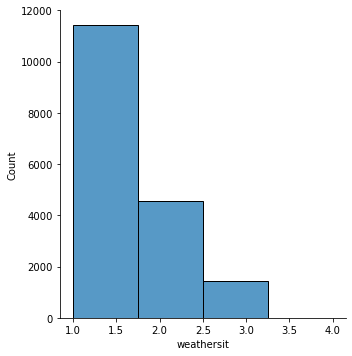

In [ ]:
sns.displot(bike_df['weathersit'], kde=False, bins=4)
plt.ylim(0, 12000)

# counts of users for the different weather situation

<Figure size 1440x1440 with 0 Axes>

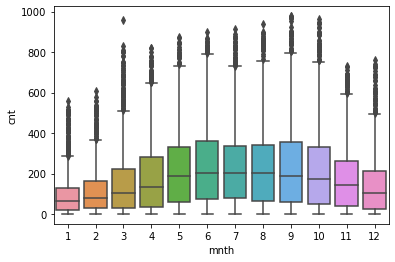

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.boxplot(x='mnth', y='cnt', data=bike_df)
plt.figure(figsize=(20,20))

# average total count of users each month

<AxesSubplot:xlabel='weekday', ylabel='hr'>

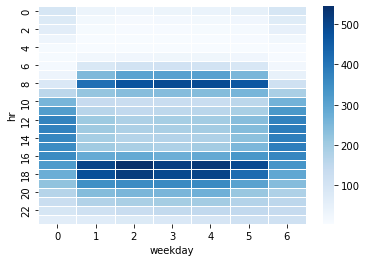

In [ ]:
bikeheat = bike_df
bikeheat = bikeheat.pivot_table(index='hr', columns='weekday', values='cnt')
sns.heatmap(bikeheat, cmap='Blues', linecolor='white', linewidth=1)

# shows a heatmap of the number of users each hour on different days of the week

# Data Analysis Pipeline

### Load Data:

In [ ]:
bike_df = pd.read_csv("../data/raw/Bike-Sharing-Dataset/hour.csv")

### Clean, Processing and Wrangling Data:

In [ ]:
final_cols = bike_df[['season','mnth','hr','weekday','workingday','weathersit','casual','registered','cnt']]

# picked only the columns to be used

In [ ]:
replaced_season = final_cols.replace({'season' : { 1:'Winter', 2:'Spring',3:'Summer',4:'Fall' }})

# modified season value to corresponding season name 

In [ ]:
replaced_mnth = replaced_season.replace({'mnth' : { 1:'January',2:'February',3:'March',4:'April',
                                                    5:'May',6:'June',7:'July',8:'August',9:'September',
                                                   10:'October', 11:'November', 12:'December'}})

# modied mnth values to corresponding month name

In [ ]:
replaced_weekday = replaced_mnth.replace({'weekday' : {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',
                                                       4:'Thursday',5:'Friday',6:'Saturday'}})

# modified weekday values to corresponding week day name
# note: to check that 0 corresponds to Sunday and not Monday, I checked dteday on calendar and saw what day it lands

In [ ]:
renamed_columns = replaced_weekday.rename(columns={'season':'Season','mnth':'Month','hr':'Hour (24hr)',
                                                   'weekday':'Weekday','workingday':'Work Day Status',
                                                   'weathersit':'Weather Situation','casual':'Unregistered Users',
                                                   'registered':'Registered Users','cnt':'Total User Count'})

#renamed the columns to desired title

# Method Chaining and writing Python programs

In [ ]:
bikeShare_df = (
  pd.read_csv("../data/raw/Bike-Sharing-Dataset/hour.csv")
    .drop(['instant','dteday','yr','holiday','temp','atemp','hum','windspeed'],axis=1)
    .reset_index(drop=True)
    .replace({'season' : { 1:'Winter', 2:'Spring',3:'Summer',4:'Fall' }})
    .replace({'mnth' : { 1:'January',2:'February',3:'March',4:'April',
                                 5:'May',6:'June',7:'July',8:'August',9:'September',
                                10:'October', 11:'November', 12:'December'}})
    .replace({'weekday' : {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',
                           4:'Thursday',5:'Friday',6:'Saturday'}})
    .rename(columns={'season':'Season','mnth':'Month','hr':'Hour (24hr)',
                     'weekday':'Weekday','workingday':'Work Day Status',
                     'weathersit':'Weather Situation','casual':'Unregistered Users',
                     'registered':'Registered Users','cnt':'Total User Count'})
)

### Wrap method chain to function

In [ ]:
def load_and_process(url_or_path_to_csv_file):

    bikeShare_df = (
  pd.read_csv("url_or_path_to_csv_file")
    .drop(['instant','dteday','yr','holiday','temp','atemp','hum','windspeed'],axis=1)
    .reset_index(drop=True)
    .replace({'season' : { 1:'Winter', 2:'Spring',3:'Summer',4:'Fall' }})
    .replace({'mnth' : { 1:'January',2:'February',3:'March',4:'April',
                                 5:'May',6:'June',7:'July',8:'August',9:'September',
                                10:'October', 11:'November', 12:'December'}})
    .replace({'weekday' : {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',
                           4:'Thursday',5:'Friday',6:'Saturday'}})
    .rename(columns={'season':'Season','mnth':'Month','hr':'Hour (24hr)',
                     'weekday':'Weekday','workingday':'Work Day Status',
                     'weathersit':'Weather Situation','casual':'Unregistered Users',
                     'registered':'Registered Users','cnt':'Total User Count'})
    )
    return bikeShare_df

# Analysis Discussing Research Questions

In [ ]:
bikeShare_df.head()

,Unnamed: 0,Season,Month,Hour (24hr),Weekday,Work Day Status,Weather Situation,Unregistered Users,Registered Users,Total User Count
0,0,Winter,January,0,Saturday,0,1,3,13,16
1,1,Winter,January,1,Saturday,0,1,8,32,40
2,2,Winter,January,2,Saturday,0,1,5,27,32
3,3,Winter,January,3,Saturday,0,1,3,10,13
4,4,Winter,January,4,Saturday,0,1,0,1,1


## 

## Q1. What variables have an effect on the frequency of users?

<AxesSubplot:xlabel='Month', ylabel='Total User Count'>

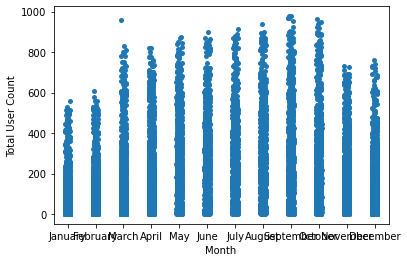

In [ ]:
sns.stripplot(x='Month', y='Total User Count', data=bikeShare_df, jitter=True, dodge=True)

<AxesSubplot:xlabel='Season', ylabel='Total User Count'>

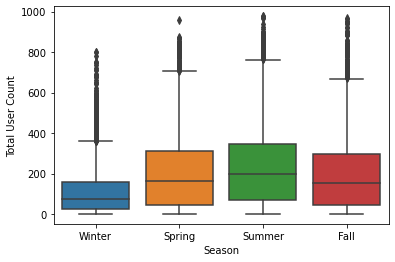

In [ ]:
sns.boxplot(x='Season', y='Total User Count', data=bikeShare_df)

<AxesSubplot:xlabel='Weather Situation', ylabel='Total User Count'>

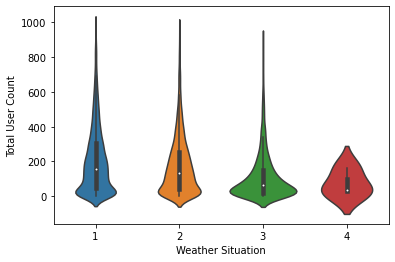

In [ ]:
sns.violinplot(x='Weather Situation', y='Total User Count', data=bikeShare_df)

<AxesSubplot:xlabel='Weather Situation', ylabel='Month'>

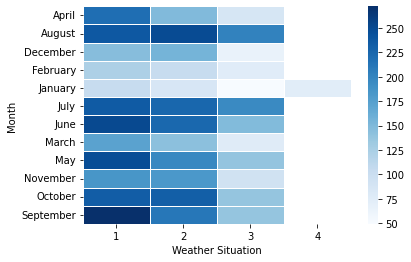

In [ ]:
bikeShareHeat = bikeShare_df
bikeShareHeat = bikeShareHeat.pivot_table(index='Month', columns='Weather Situation', values='Total User Count')
sns.heatmap(bikeShareHeat, cmap='Blues', linecolor='white', linewidth=1)

#### Given the graphs above, we are able to answer the question: "What variables have an effect on the frequency of users?" We can see that the variables that have an effect on the frequency of users includes the weather condition, and the season. There is a drop in numbers in the corresponding months for when the weather condition level is higher, and when the months are in the winter season.

##

## Q2. What is the membership status of the users? (registered vs non-registered)

<AxesSubplot:xlabel='Month', ylabel='Unregistered Users'>

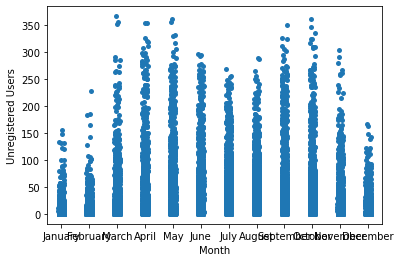

In [ ]:
sns.stripplot(x='Month', y='Unregistered Users', data=bikeShare_df, jitter=True, dodge=True)

<AxesSubplot:xlabel='Month', ylabel='Registered Users'>

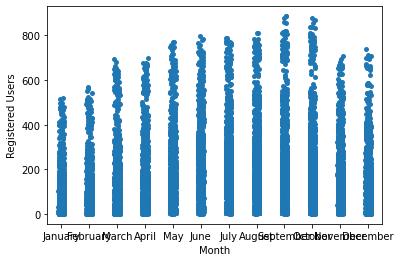

In [ ]:
sns.stripplot(x='Month', y='Registered Users', data=bikeShare_df, jitter=True, dodge=True)

#### When plotting the registered users and unregistered users throughout the year, we are able to compare and see that there are more registered compared to unregistered users. This answers our second question. The membership status of the majority of users are registered users.

# 

## Q3. Who are the registered customers?

<AxesSubplot:xlabel='Work Day Status', ylabel='Registered Users'>

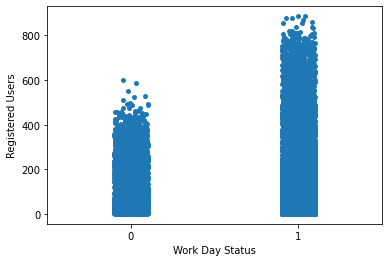

In [ ]:
sns.stripplot(x='Work Day Status', y='Registered Users', data=bikeShare_df, jitter=True)

<AxesSubplot:xlabel='Hour (24hr)', ylabel='Registered Users'>

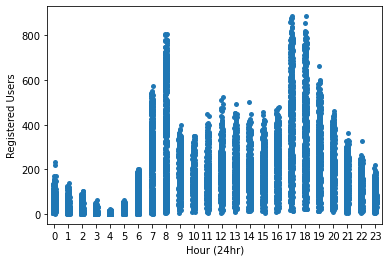

In [ ]:
sns.stripplot(x='Hour (24hr)', y='Registered Users', data=bikeShare_df, jitter=True, dodge=True)

#### When analyzing the registered users by plotting its frequency over work day status (0: weekend or holiday, 1: weekday) we can see that the bikes are usually used on a workday. When the count of registered users are plotted through a 24 hour time range, we can see a peak at 8am, and another peak at 5 pm. This implies that the bikes are being used by 9-5 workers. To further support this conclusion, we can look at the rise in usage around 12-1 pm, which is usually lunch time for 9-5 workers. In conclusion, the registered customers (implies recurring customers) are 9-5 workers who use the bikes to get to, and from work.

##

## Q4. What are potential solutions to minimize the dip around Nov, Dec, Jan Feb months and why is it good??

#### Given that it's the recurring customers are 9-5 workers, reaching out to corporations that have the setting of 9-5 shifts and giving discounts around those times could be a potential solution since nobody wants to pay that much when the weather condition is bad. The benefits of having a consistent distribution amongst the different months could be the positive environmental impact and also the physical impact on the users (specially cuz physical stagnancy occurs during winter months)